In [3]:
import spacy
import networkx as nx


en_nlp = spacy.load('en_core_web_sm')

doc = en_nlp("the hospital admitted the patient with cancer because she required intensive care")

edges = []
for tok in doc:
    edges.extend([(tok.i, child.i) for child in tok.children])


g = nx.Graph()
g.add_edges_from(edges)

distance_matrix = nx.floyd_warshall_numpy(g)
idx_labels = [str(tok) for toc in doc]

In [4]:
spacy.displacy.render(doc, style="dep")

In [11]:
from conllu import parse_incr
import pandas as pd
from itertools import groupby
from ast import literal_eval


data_file = open("/Users/aakritilakshmanan/Downloads/testing.conllu", "r", encoding="utf-8")
data = data_file.read().splitlines()
data = [ a[1:] if "_" in a else a for a in data]

for idx, val in enumerate(data):
    if "(" in val:
        data[idx] = (str(val[val.find("(")+1:val.find(",")]), str(val[val.find(",")+2:-1]))


i = (list(g) for _, g in groupby(data, key=''.__ne__))
print(i)
split_file = [a + b for a, b in zip(i, i)]

split = [list(g) for m, g in groupby(data, key=lambda x: x != "") if m]


<generator object <genexpr> at 0x7fbe03d1c850>


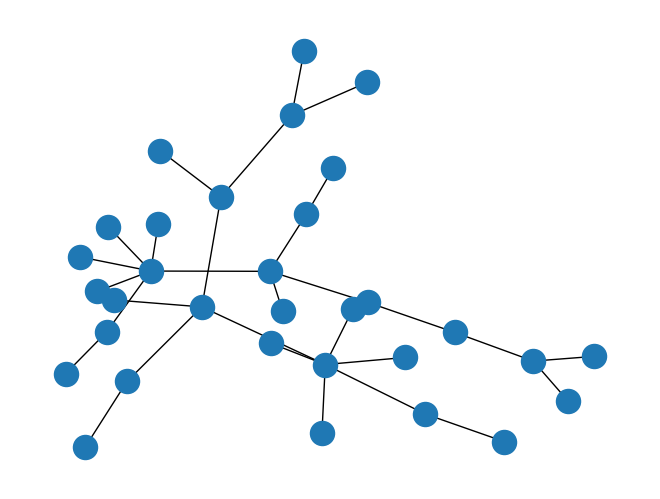

In [13]:
distance_matrix = []
dicts = []

for val in split:
    G=nx.Graph()
    G.add_nodes_from(val[0].split(" "))
    G.add_edges_from(val[1:])
    nx.draw(G)
    distance_matrix.append(nx.floyd_warshall_numpy(G))


In [14]:
distance_matrix

[array([[0., 1., 3., 2., 3., 2., 4., 4., 3., 3., 3., 3., 3., 2., 4., 3.],
        [1., 0., 2., 1., 2., 1., 3., 3., 2., 2., 2., 2., 2., 1., 3., 2.],
        [3., 2., 0., 1., 4., 3., 5., 5., 4., 4., 4., 4., 4., 3., 5., 4.],
        [2., 1., 1., 0., 3., 2., 4., 4., 3., 3., 3., 3., 3., 2., 4., 3.],
        [3., 2., 4., 3., 0., 1., 3., 3., 2., 4., 4., 4., 4., 3., 5., 4.],
        [2., 1., 3., 2., 1., 0., 2., 2., 1., 3., 3., 3., 3., 2., 4., 3.],
        [4., 3., 5., 4., 3., 2., 0., 2., 1., 5., 5., 5., 5., 4., 6., 5.],
        [4., 3., 5., 4., 3., 2., 2., 0., 1., 5., 5., 5., 5., 4., 6., 5.],
        [3., 2., 4., 3., 2., 1., 1., 1., 0., 4., 4., 4., 4., 3., 5., 4.],
        [3., 2., 4., 3., 4., 3., 5., 5., 4., 0., 2., 2., 2., 1., 3., 2.],
        [3., 2., 4., 3., 4., 3., 5., 5., 4., 2., 0., 2., 2., 1., 3., 2.],
        [3., 2., 4., 3., 4., 3., 5., 5., 4., 2., 2., 0., 2., 1., 3., 2.],
        [3., 2., 4., 3., 4., 3., 5., 5., 4., 2., 2., 2., 0., 1., 3., 2.],
        [2., 1., 3., 2., 3., 2., 4., 4

In [187]:
import pickle
with open('/Users/aakritilakshmanan/Downloads/distance.pkl', 'wb') as f:
    pickle.dump(distance_matrix, f)

In [22]:
from nltk import Tree


en_nlp = spacy.load('en_core_web_sm')

doc = en_nlp("The quick brown fox jumps over the lazy dog.")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_


[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

        jumps                    
  ________|______________         
 |        |             over     
 |        |              |        
 |       fox            dog      
 |    ____|_____      ___|____    
 .  The quick brown the      lazy



[None]

AttributeError: 'str' object has no attribute 'reverse'